In [2]:
import sys, os
import json
import pandas as pd
import numpy as np
import time, math
import cv2
from operator import sub
import matplotlib
import matplotlib.transforms as transforms
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.latex.preamble': [r'\usepackage{amsmath}']
})

v = 27

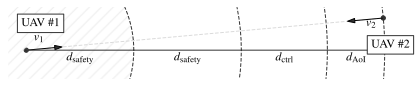

In [7]:
fig, ax = plt.subplots()

width = 1100
height = 200
ax.axis([0, width, 0, height])
ax.plot(0,0)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

uav_width = 12

x_center = 50
y_center = 80#height / 2
center = (x_center, y_center)

angle = math.pi / 35
sin_a = math.sin(angle)
cos_a = math.cos(angle)

R = 1000
uav_2_x = x_center + cos_a * R
uav_2_y = y_center + sin_a * R

ax.plot([x_center, uav_2_x],[y_center, uav_2_y], '--',color='#dadada', lw=1)

uav_1 = matplotlib.patches.Ellipse(center, width=uav_width, height=uav_width, fill=True, lw=1, ec='#333', fc='#333', clip_on=True)
ax.add_patch(uav_1)
ax.text(x_center + 40, y_center + 60, 'UAV \#1', va='bottom', ha='center', bbox=dict(pad=4, lw=1, fc='#fff', color='#333'))
ax.arrow(x_center, y_center, 100 * cos_a, 100 * sin_a, length_includes_head=True, head_width=12, head_length=20, fc='#333', zorder=2)
ax.text(x_center + 50 * cos_a - 15, y_center + 50 * cos_a, '$v_1$', va='top', ha='center')



uav_2 = matplotlib.patches.Ellipse((uav_2_x, uav_2_y), width=uav_width, height=uav_width, fill=True, lw=1, ec='#333', fc='#333', clip_on=True)
ax.add_patch(uav_2)
ax.text(uav_2_x + 20, uav_2_y - 60, 'UAV \#2', va='top', ha='center', bbox=dict(pad=4, lw=1, fc='#fff', color='#333'))
ax.arrow(uav_2_x, uav_2_y, - 100 * math.cos(angle), -100 * math.sin(angle), length_includes_head=True, head_width=12, head_length=20, fc='#333', zorder=2)
ax.text(uav_2_x - 50 * cos_a + 15, uav_2_y -50 * sin_a +5, '$v_2$', va='top', ha='center')

R1 = 2 * 150
R2 = 2 * R1
R3 = R2 + 60*4
c1 = matplotlib.patches.Ellipse(center, width=2*R1, height=2*R1, fill=False, lw=1, ec='#ebebeb', clip_on=True, ls='--', hatch='//')
ax.add_patch(c1)
c1 = matplotlib.patches.Ellipse(center, width=2*R1, height=2*R1, fill=False, lw=1, ec='#333', clip_on=True, ls='--')
ax.add_patch(c1)

c2 = matplotlib.patches.Ellipse(center, width=2*R2, height=2*R2, fill=False, lw=1, ec='#333', clip_on=True, ls='--')
ax.add_patch(c2)

# c2 = matplotlib.patches.Ellipse(center, width=2*R2, height=2*R2, fill=False, lw=1, ec='#333', clip_on=True, ls='--')
# ax.add_patch(c2)

c3 = matplotlib.patches.Ellipse(center, width=2*R3, height=2*R3, fill=False, lw=1, ec='#333', clip_on=True, ls='--')
ax.add_patch(c3)


c4 = matplotlib.patches.Ellipse(center, width=2000, height=2000, fill=False, lw=1, ec='#333', clip_on=True, ls='--')
ax.add_patch(c4)


ax.plot([x_center, x_center + R1],[y_center, y_center], color='#333', lw=1)
ax.text(x_center + R1 / 2, y_center - 6, r'$d_\mathrm{{safety}}$', va='top', ha='center')

ax.plot([x_center + R1, x_center + R2],[y_center, y_center], color='#333', lw=1)
ax.text(x_center + 3*R1 / 2, y_center - 6, r'$d_\mathrm{{safety}}$', va='top', ha='center')

ax.plot([x_center + R2, x_center + R3],[y_center, y_center], color='#333', lw=1)
ax.text(x_center + R2 + (R3-R2) / 2, y_center - 6, r'$d_\mathrm{{ctrl}}$', va='top', ha='center')

ax.plot([x_center + R3, x_center + R],[y_center, y_center], color='#333', lw=1)
ax.text(x_center + R3 + (R-R3) / 2, y_center - 6, r'$d_\mathrm{{AoI}}$', va='top', ha='center')


ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)

fig.tight_layout()

fig.savefig(f"../figures/ep_schematic_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"../figures/ep_schematic_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.1)

plt.show()

In [4]:
print(R3)

720


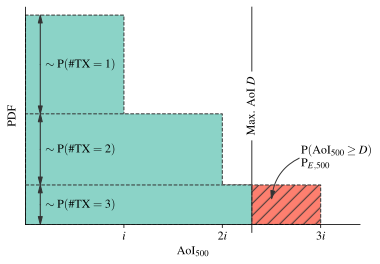

In [151]:
fig, ax = plt.subplots()
aoi_color ='#8bd3c7'
sf_color = '#fd7f6f'

y = 5.3

max_aoi = 2.3

bar_widths = np.array([2.5, 1.8, 1])
bar_centers = y-(np.cumsum(bar_widths) - bar_widths / 2)

ax.barh([0.5], [3], [1], fc=sf_color, linewidth=1, ec='#333', ls='--', hatch='//')
ax.barh(bar_centers -0.05, [1, 2, max_aoi], bar_widths + 0.1, fc=aoi_color, linewidth=1, ec='#333', ls='--')

for i,c in enumerate(bar_centers):
    x = 0.15
    #ax.plot([x, x],[c-bar_widths[i]/2,c+bar_widths[i]/2], '-', lw=1, color='#333')
    plt.arrow(x, c, 0, bar_widths[i] / 2, shape='full', lw=1, length_includes_head=True, head_width=0.04, head_length=0.2, color='#333')
    plt.arrow(x, c, 0, -bar_widths[i] / 2, shape='full', lw=1, length_includes_head=True, head_width=0.04, head_length=0.2, color='#333')
    ax.text(x + 0.05, c, f'$\sim \\mathrm{{P}}(\\mathrm{{\#TX}} = {i+1})$', ha='left', va='center')


ax.plot([max_aoi, max_aoi],[-0.2, 5.5], clip_on=False, lw=1, color='#333')
ax.text(max_aoi, 3, 'Max. AoI $D$', va='center', ha='center', rotation=90, bbox=dict(pad=5, fc='#fff', ec=None, lw=0))
ax.text(3.1 - 0.3, 1.7, '$\\mathrm{{P}}(\\mathrm{{AoI}}_{{500}} \geq D)$ \n $\\mathrm{{P}}_{E,500}$', va='center', ha='left')
arrow = patches.FancyArrowPatch((3.1 - 0.3, 1.7), (2.8 - 0.3, 0.6), connectionstyle=f"arc3,rad=0.3", arrowstyle="Simple, tail_width=0, head_width=4, head_length=8", color='#333', zorder=2)
ax.add_patch(arrow)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.axis([0, 3.4, 0, 5.5])
plt.xticks([1,2,3], ['$i$', '$2i$', '$3i$'])
plt.yticks([])
plt.ylabel('PDF')
plt.xlabel('$\\mathrm{{AoI}}_{{500}}$')
plt.show()

fig.tight_layout()

fig.savefig(f"../figures/aoi_schematic_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"../figures/aoi_schematic_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.1)

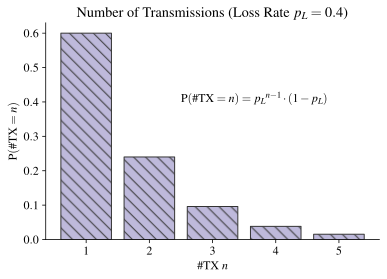

In [150]:
fig, ax = plt.subplots()
color='#beb9db'#'#7eb0d5'

p_l = 0.4
n = np.arange(1,6,1)
p_n = np.power(p_l, n-1) * (1-p_l)

ax.bar(n, p_n, ec='#333', hatch='\\\\', lw=1, fc=color)
plt.xlabel('\#TX $n$')
plt.ylabel('$\\mathrm{{P}}(\\mathrm{{\#TX}} = n)$')
ax.text(2.5, 0.4, '$\\mathrm{{P}}(\\mathrm{{\#TX}} = n) = {p_L}^{{n-1}} \cdot \\left( 1-p_L \\right)$')
plt.title(f'Number of Transmissions (Loss Rate $p_L = {p_l}$)')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.show()
fig.savefig(f"../figures/num_tx_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"../figures/num_tx_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.1)

In [128]:
print(p_n)

[1.5       0.6       0.24      0.096     0.0384    0.01536   0.006144
 0.0024576]


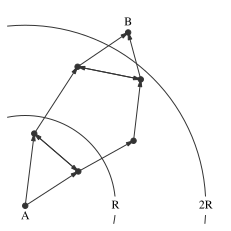

In [231]:
uav_width = 30

def plot_node(ax, pos, alpha):
    uav_1 = matplotlib.patches.Ellipse(pos, width=uav_width, height=uav_width, fill=True, lw=1, ec='#333', fc='#333', clip_on=True, alpha=alpha)
    ax.add_patch(uav_1)

def plot_arrow(ax, frm, to, ls='-.', color='#333'):
    x1,y1 = frm
    x2, y2 = to
    ax.arrow(x1, y1, x2-x1, y2-y1, length_includes_head=True, head_width=20, head_length=40, fc=color, zorder=2, fill=True, color=color, ls='-')


fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

R = 500

center = (100, 100)

for i in range(2):
    c1 = matplotlib.patches.Ellipse(center, width=2*R *(i+1), height=2*R *(i+1), fill=False, lw=1, ec='#333', clip_on=True)
    strng = '' if i == 0 else i+1
    ax.text(100+ R *(i+1), 100, f'{strng}R', bbox=dict(pad=4, lw=0, fc='#fff'), ha='center', va='center')
    ax.add_patch(c1)

## START A
plot_node(ax, center,1)
ax.text(center[0], center[1] -30, 'A', va='top', ha='center')
plot_node(ax, (394, 290), 1)
plot_arrow(ax, center, (394, 290))
plot_node(ax, (150, 500), 1)
plot_arrow(ax, center, (150, 500), '--')
plot_arrow(ax, (394, 290), (150, 500))
plot_arrow(ax, (150, 500), (394, 290))
plot_arrow(ax, (394, 290), (700, 460))
plot_node(ax, (700, 460), 1)
plot_arrow(ax, (700, 460), (740, 800))
plot_arrow(ax, (150, 500), (390, 870))
plot_node(ax, (740, 800), 1)
plot_node(ax, (390, 870), 1)
plot_arrow(ax, (740, 800), (670, 1060))
plot_arrow(ax, (390, 870), (670, 1060))
plot_arrow(ax, (390, 870), (740, 800))
plot_arrow(ax, (740, 800), (390, 870))

## END B
plot_node(ax, (670, 1060), 1)
ax.text(670, 1060 + 25, 'B', va='bottom', ha='center')

plt.axis([0, 1200, 0, 1200])

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)

plt.show()
fig.savefig(f"../figures/dr_schematic_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"../figures/dr_schematic_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.1)